# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from tqdm.notebook import tqdm

# 2. Import Data

Import stock price data

In [2]:
stock_prices_df = pd.read_csv("data/price.csv")
stock_prices_df["Date"] = pd.to_datetime(stock_prices_df["Date"])
stock_prices_df = stock_prices_df.set_index("Date")
stock_prices_df

A         AA    AAL        AAP        AAPL        ABBV  \
Date                                                                          
1980-01-02         NaN   3.217068    NaN        NaN         NaN         NaN   
1980-01-03         NaN   3.187954    NaN        NaN         NaN         NaN   
1980-01-04         NaN   3.187954    NaN        NaN         NaN         NaN   
1980-01-07         NaN   3.246180    NaN        NaN         NaN         NaN   
1980-01-08         NaN   3.289852    NaN        NaN         NaN         NaN   
...                ...        ...    ...        ...         ...         ...   
2023-12-04  128.880005  26.809999  13.35  55.630001  189.429993  144.149994   
2023-12-05  127.879997  25.240000  13.13  53.160000  193.419998  144.570007   
2023-12-06  128.910004  25.120001  13.48  55.160000  192.320007  146.380005   
2023-12-07  128.679993  24.940001  13.91  56.250000  194.270004  147.970001   
2023-12-08  127.199997  25.020000  13.76  56.270000  195.710007  149.279999   

            ABC        ABNB         ABT       ACGL  ...         YUM  \
Date                                                ...               
1980-01-02  NaN         NaN         NaN        NaN  ...         NaN   
1980-01-03  NaN         NaN         NaN        NaN  ...         NaN   
1980-01-04  NaN         NaN         NaN        NaN  ...         NaN   
1980-01-07  NaN         NaN         NaN        NaN  ...         NaN   
1980-01-08  NaN         NaN         NaN        NaN  ...         NaN   
...         ...         ...         ...        ...  ...         ...   
2023-12-04  NaN  133.699997  105.190002  81.989998  ...  125.650002   
2023-12-05  NaN  133.710007  104.349998  81.849998  ...  124.379997   
2023-12-06  NaN  135.309998  104.940002  79.970001  ...  124.809998   
2023-12-07  NaN  139.839996  104.050003  78.339996  ...  124.269997   
2023-12-08  NaN  140.679993  104.510002  79.300003  ...  124.339996   

                    Z         ZBH        ZBRA         ZG     ZI       ZION  \
Date                                                                         
1980-01-02        NaN         NaN         NaN        NaN    NaN        NaN   
1980-01-03        NaN         NaN         NaN        NaN    NaN        NaN   
1980-01-04        NaN         NaN         NaN        NaN    NaN        NaN   
1980-01-07        NaN         NaN         NaN        NaN    NaN        NaN   
1980-01-08        NaN         NaN         NaN        NaN    NaN        NaN   
...               ...         ...         ...        ...    ...        ...   
2023-12-04  44.090000  116.889999  239.369995  42.330002  14.71  38.680000   
2023-12-05  44.290001  115.820000  234.360001  42.520000  14.48  37.389999   
2023-12-06  45.090000  116.129997  234.130005  43.490002  15.50  37.150002   
2023-12-07  46.730000  117.290001  233.229996  45.009998  15.24  38.380001   
2023-12-08  46.410000  117.300003  236.130005  44.660000  15.64  38.930000   

                   ZM          ZS         ZTS  
Date                                           
1980-01-02        NaN         NaN         NaN  
1980-01-03        NaN         NaN         NaN  
1980-01-04        NaN         NaN         NaN  
1980-01-07        NaN         NaN         NaN  
1980-01-08        NaN         NaN         NaN  
...               ...         ...         ...  
2023-12-04  68.160004  198.259995  182.119995  
2023-12-05  68.720001  198.910004  179.649994  
2023-12-06  70.940002  197.910004  182.000000  
2023-12-07  71.930000  200.050003  181.830002  
2023-12-08  73.059998  198.800003  184.600006  

[11079 rows x 1005 columns]

Import categorical features

In [3]:
cat_features = pd.read_csv("data/categorical.csv")
cat_features = cat_features.set_index("Unnamed: 0")
cat_features = cat_features.rename_axis(None, axis = 0)
cat_features

AAPL                    MSFT  \
sectors  Information Technology  Information Technology   

                          GOOGL                    GOOG  \
sectors  Communication Services  Communication Services   

                           AMZN       BRK.B          UNH          JNJ     XOM  \
sectors  Consumer Discretionary  Financials  Health Care  Health Care  Energy   

                              V  ...        UPST               TAP  \
sectors  Information Technology  ...  Financials  Consumer Staples   

                  WE                    CVNA         NVAX         EHAB  \
sectors  Real Estate  Consumer Discretionary  Health Care  Health Care   

                OPEN        UWMC          MBC          FG  
sectors  Real Estate  Financials  Industrials  Financials  

[1 rows x 1005 columns]

Import numerical features

In [4]:
num_features = pd.read_csv("data/features.csv")
num_features["Date"] = pd.to_datetime(num_features["Date"])
num_features = num_features.set_index("Date")

# Subtract 530 days (roughly 365 working days) from date-time index of num_features since we want to see the relationship between the current economic indicators and the stock price
# 365 working days into the future which we are trying to predict.
num_features.index = [index - dt.timedelta(days=530) for index in num_features.index]
num_features

BCI       CCI       CLI  3 month interbank rate  Broad money  \
1988-07-20  98.82303  100.6509  99.79321                    8.16    26.291189   
1988-07-21  98.82303  100.6509  99.79321                    8.16    26.291189   
1988-07-22  98.82303  100.6509  99.79321                    8.16    26.291189   
1988-07-23  98.82303  100.6509  99.79321                    8.16    26.291189   
1988-07-24  98.82303  100.6509  99.79321                    8.16    26.291189   
...              ...       ...       ...                     ...          ...   
2021-07-11  98.91054   97.0624  98.88888                    4.51   177.318578   
2021-07-12  98.91054   97.0624  98.88888                    4.51   177.318578   
2021-07-13  98.91054   97.0624  98.88888                    4.51   177.318578   
2021-07-14  98.91054   97.0624  98.88888                    4.51   177.318578   
2021-07-15  98.91054   97.0624  98.88888                    4.51   177.318578   

            Construction  Consumer prices  Manufacturing hourly earnings  \
1988-07-20     40.385124        53.751419                      52.855468   
1988-07-21     40.385124        53.751419                      52.855468   
1988-07-22     40.385124        53.751419                      52.855468   
1988-07-23     40.385124        53.751419                      52.855468   
1988-07-24     40.385124        53.751419                      52.855468   
...                  ...              ...                            ...   
2021-07-11    164.796803       125.221820                     128.973371   
2021-07-12    164.796803       125.221820                     128.973371   
2021-07-13    164.796803       125.221820                     128.973371   
2021-07-14    164.796803       125.221820                     128.973371   
2021-07-15    164.796803       125.221820                     128.973371   

            Industrial production  Long-term interest rate  \
1988-07-20              61.105826                     8.21   
1988-07-21              61.105826                     8.21   
1988-07-22              61.105826                     8.21   
1988-07-23              61.105826                     8.21   
1988-07-24              61.105826                     8.21   
...                           ...                      ...   
2021-07-11             100.598801                     3.62   
2021-07-12             100.598801                     3.62   
2021-07-13             100.598801                     3.62   
2021-07-14             100.598801                     3.62   
2021-07-15             100.598801                     3.62   

            Manufacturing confidence indicator  Narrow money  \
1988-07-20                                -5.6     26.324891   
1988-07-21                                -5.6     26.324891   
1988-07-22                                -5.6     26.324891   
1988-07-23                                -5.6     26.324891   
1988-07-24                                -5.6     26.324891   
...                                        ...           ...   
2021-07-11                                -3.2    655.997485   
2021-07-12                                -3.2    655.997485   
2021-07-13                                -3.2    655.997485   
2021-07-14                                -3.2    655.997485   
2021-07-15                                -3.2    655.997485   

            Overnight interbank rate  Car registrations  \
1988-07-20                      8.23         138.407385   
1988-07-21                      8.23         138.407385   
1988-07-22                      8.23         138.407385   
1988-07-23                      8.23         138.407385   
1988-07-24                      8.23         138.407385   
...                              ...                ...   
2021-07-11                      4.10          37.603772   
2021-07-12                      4.10          37.603772   
2021-07-13                      4.10          37.603772   
2021-07-14                 

# 3. Evolution of Available Stock Price Data Over Time
Most of the largest companies (by market capitalisation) didn't even exist in 1980 therefore, there is a lot of nan data on dates close to 1980. This plot gives us a good idea of how much real data we have to work with and the date period corresponding to most of that data.

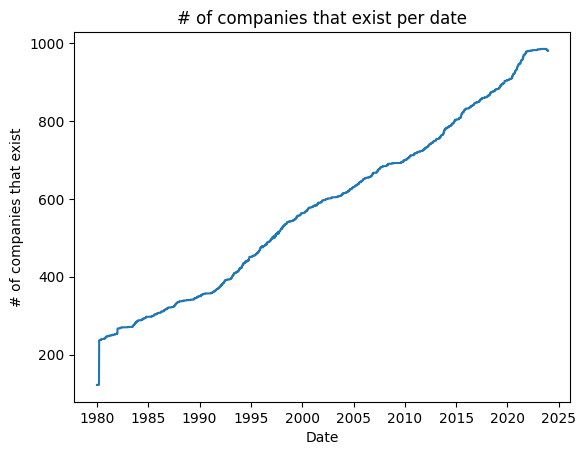

In [5]:
notnan = []
for i in range(len(stock_prices_df)):
    notnan.append(stock_prices_df.shape[1] - stock_prices_df.iloc[i,:].isna().sum())

plt.plot(stock_prices_df.index, notnan)
plt.title("# of companies that exist per date")
plt.xlabel("Date")
plt.ylabel("# of companies that exist");

# 4. Stock Price of All Stocks Over Time 

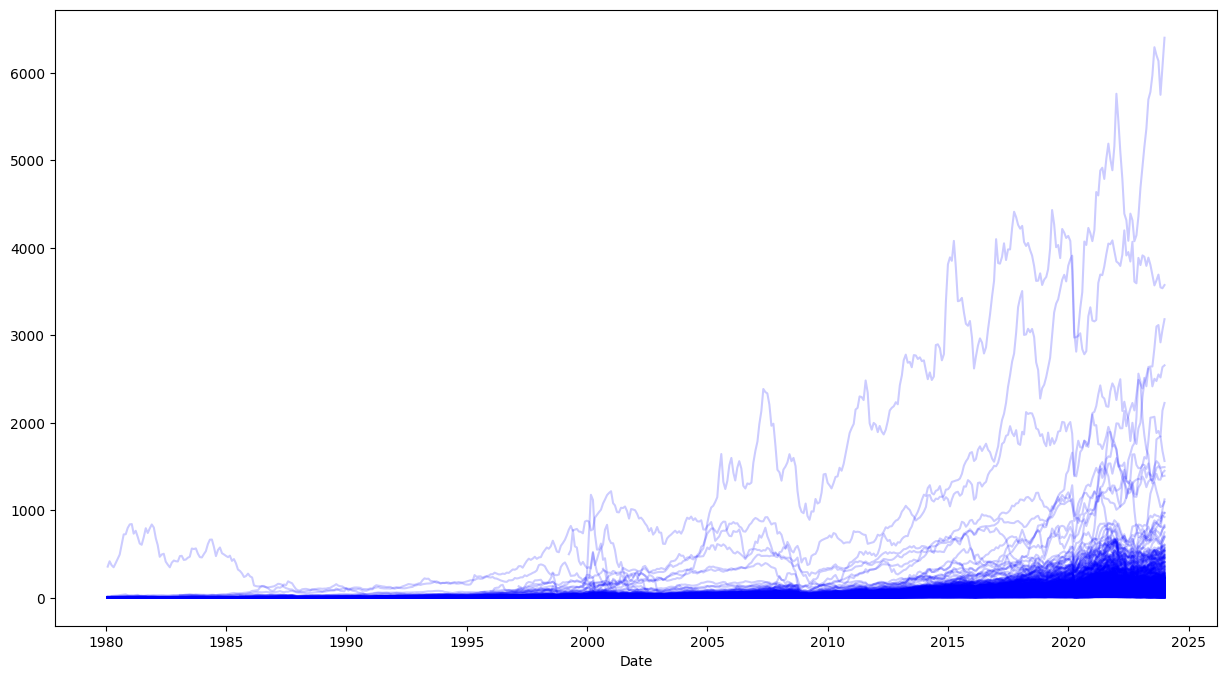

In [6]:
# Resample the data for quicker computation of the plot
stock_prices_monthly_df = stock_prices_df.resample("1M").mean()

# Plot the data
plt.figure(figsize=(15,8))
sns.lineplot(data=stock_prices_monthly_df, legend=False, palette=['b']*stock_prices_monthly_df.shape[1], dashes=False, alpha=0.2);

# 5. Economic Indicators Visualised Over Time

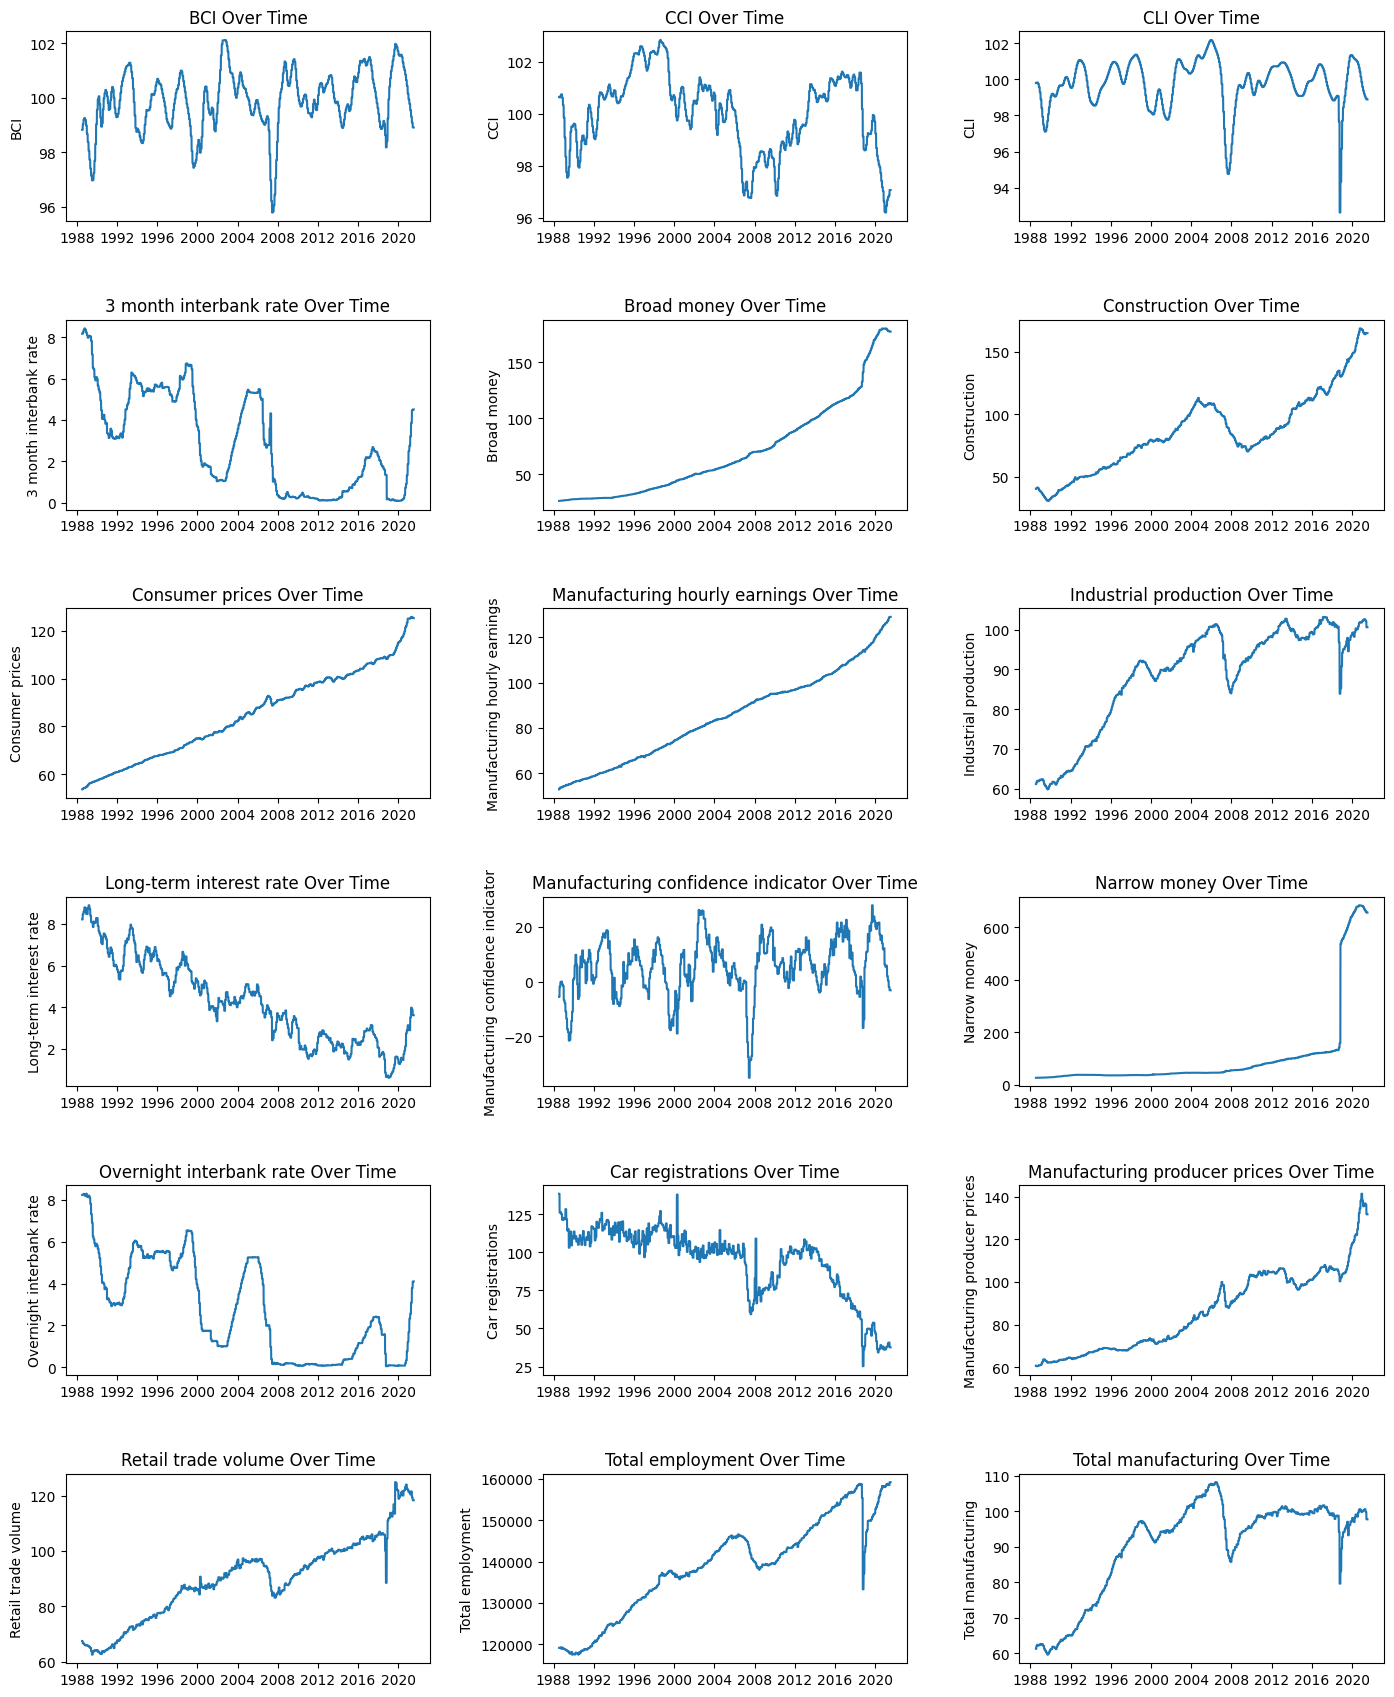

In [7]:
# Determine the grid size
num_plots = len(num_features.columns)
n_cols = 3  # Number of columns in the grid
n_rows = (num_plots + n_cols - 1) // n_cols  # Calculate rows needed, rounding up

# Create a figure and a grid of subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 3))
fig.tight_layout(pad=5.0)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Iterate over the numerical features to create a line plot for each
for i, feature in enumerate(num_features.columns):
    sns.lineplot(ax=axes[i], data=num_features, x=num_features.index, y=feature)
    axes[i].set_title(f"{feature} Over Time")  # Set title to the feature name

plt.show()

# 6. Correlation Matrix

In [8]:
def plot_correlation_matrix_of_df(df, columns_order, annot = True):
    '''Uses the seaborn heatmap to plot the correlation matrix of a pandas dataframe'''
    # Sort columns based on column column name
    df = df[columns_order]

    # Calculate correlation matrix
    corrs = df.corr().round(2)
    
    # Since this is a symmetric table, set up a mask so that we only plot values below the main diagonal.
    mask = np.triu(np.ones_like(corrs, dtype=bool))
    f, ax = plt.subplots(figsize=(10, 8)) # Initialise the plots and axes

    # Plot the correlations as a seaborn heatmap, with a colourbar.
    sns.heatmap(corrs, mask=mask, center=0, annot=annot, square=True, linewidths=.5, cmap="seismic", vmin = -1, vmax = 1)

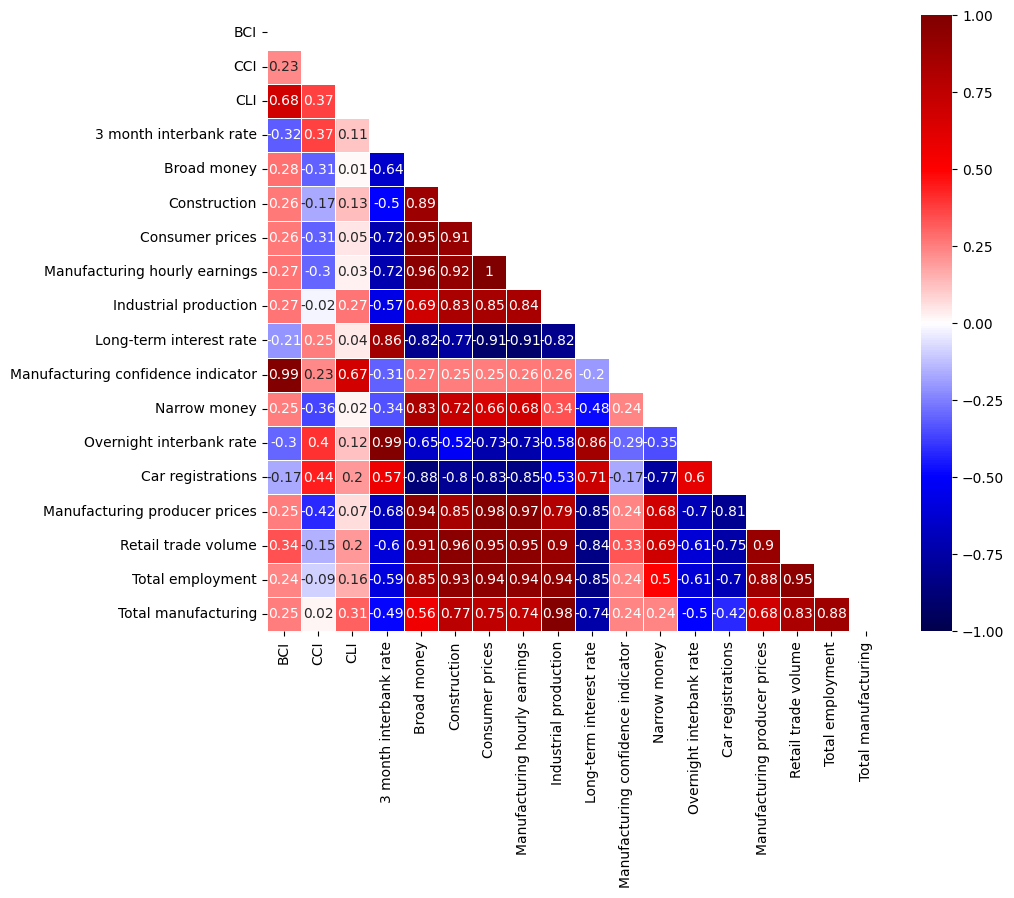

In [9]:
plot_correlation_matrix_of_df(num_features, num_features.columns,annot = True)

# 7. Relationship Between Stock Price and Economic Indicators

In [10]:
# Resample to monthly for easier computation
stock_prices_monthly_df = stock_prices_df.resample('M').mean()

# Transform stock_prices_monthly_df into a melted version
stock_prices_monthly_df['Date'] = stock_prices_monthly_df.index
stock_prices_melted_df = stock_prices_monthly_df.melt(id_vars=['Date']).set_index('Date')
stock_prices_melted_df.columns = ["stock", "price"]

# Remove all rows where price=nan
stock_prices_melted_df = stock_prices_melted_df.dropna(subset=['price'])

# Add sectors column to stock_prices_melted_df
sector = []
for s in stock_prices_melted_df["stock"]:
    sector.append(cat_features[s][0])
stock_prices_melted_df["sector"] = sector

# Merge this transformed df with the num_features df
stock_prices_melted_df = stock_prices_melted_df.merge(num_features, left_index=True, right_index=True, how='inner')
stock_prices_melted_df

stock       price                  sector       BCI       CCI  \
Date                                                                       
1988-07-31    AA    8.608157               Materials  98.82303  100.6509   
1988-07-31  AAPL    0.310653  Information Technology  98.82303  100.6509   
1988-07-31   ABT    1.146607             Health Care  98.82303  100.6509   
1988-07-31  ADBE    1.238038  Information Technology  98.82303  100.6509   
1988-07-31   ADI    1.533228  Information Technology  98.82303  100.6509   
...          ...         ...                     ...       ...       ...   
2021-06-30    ZI   48.377727  Communication Services  98.91054   97.0624   
2021-06-30  ZION   50.256436              Financials  98.91054   97.0624   
2021-06-30    ZM  359.615000  Information Technology  98.91054   97.0624   
2021-06-30    ZS  207.554091  Information Technology  98.91054   97.0624   
2021-06-30   ZTS  178.687301             Health Care  98.91054   97.0624   

                 CLI  3 month interbank rate  Broad money  Construction  \
Date                                                                      
1988-07-31  99.79321                    8.16    26.291189     40.385124   
1988-07-31  99.79321                    8.16    26.291189     40.385124   
1988-07-31  99.79321                    8.16    26.291189     40.385124   
1988-07-31  99.79321                    8.16    26.291189     40.385124   
1988-07-31  99.79321                    8.16    26.291189     40.385124   
...              ...                     ...          ...           ...   
2021-06-30  98.88888                    4.51   177.318578    164.796803   
2021-06-30  98.88888                    4.51   177.318578    164.796803   
2021-06-30  98.88888                    4.51   177.318578    164.796803   
2021-06-30  98.88888                    4.51   177.318578    164.796803   
2021-06-30  98.88888                    4.51   177.318578    164.796803   

            Consumer prices  ...  Industrial production  \
Date                         ...                          
1988-07-31        53.751419  ...              61.105826   
1988-07-31        53.751419  ...              61.105826   
1988-07-31        53.751419  ...              61.105826   
1988-07-31        53.751419  ...              61.105826   
1988-07-31        53.751419  ...              61.105826   
...                     ...  ...                    ...   
2021-06-30       125.221820  ...             100.598801   
2021-06-30       125.221820  ...             100.598801   
2021-06-30       125.221820  ...             100.598801   
2021-06-30       125.221820  ...             100.598801   
2021-06-30       125.221820  ...             100.598801   

            Long-term interest rate  Manufacturing confidence indicator  \
Date                                                                      
1988-07-31                     8.21                                -5.6   
1988-07-31                     8.21                                -5.6   
1988-07-31                     8.21                                -5.6   
1988-07-31                     8.21                                -5.6   
1988-07-31                     8.21                                -5.6   
...                             ...                                 ...   
2021-06-30                     3.62                                -3.2   
2021-06-30                     3.62                                -3.2   
2021-06-30                     3.62                                -3.2   
2021-06-30                     3.62                                -3.2   
2021-06-30                     3.62                                -3.2   

            Narrow money  Overnight interbank rate  Car registrations  \
Date                                                                    
1988-07-31     26.324891                      8.23         138.407385   
1988-07-31     26.324891                      8.23         138.407385   
1988-07-31

C:\Users\brarn\AppData\Local\Temp\ipykernel_5144\3899516403.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


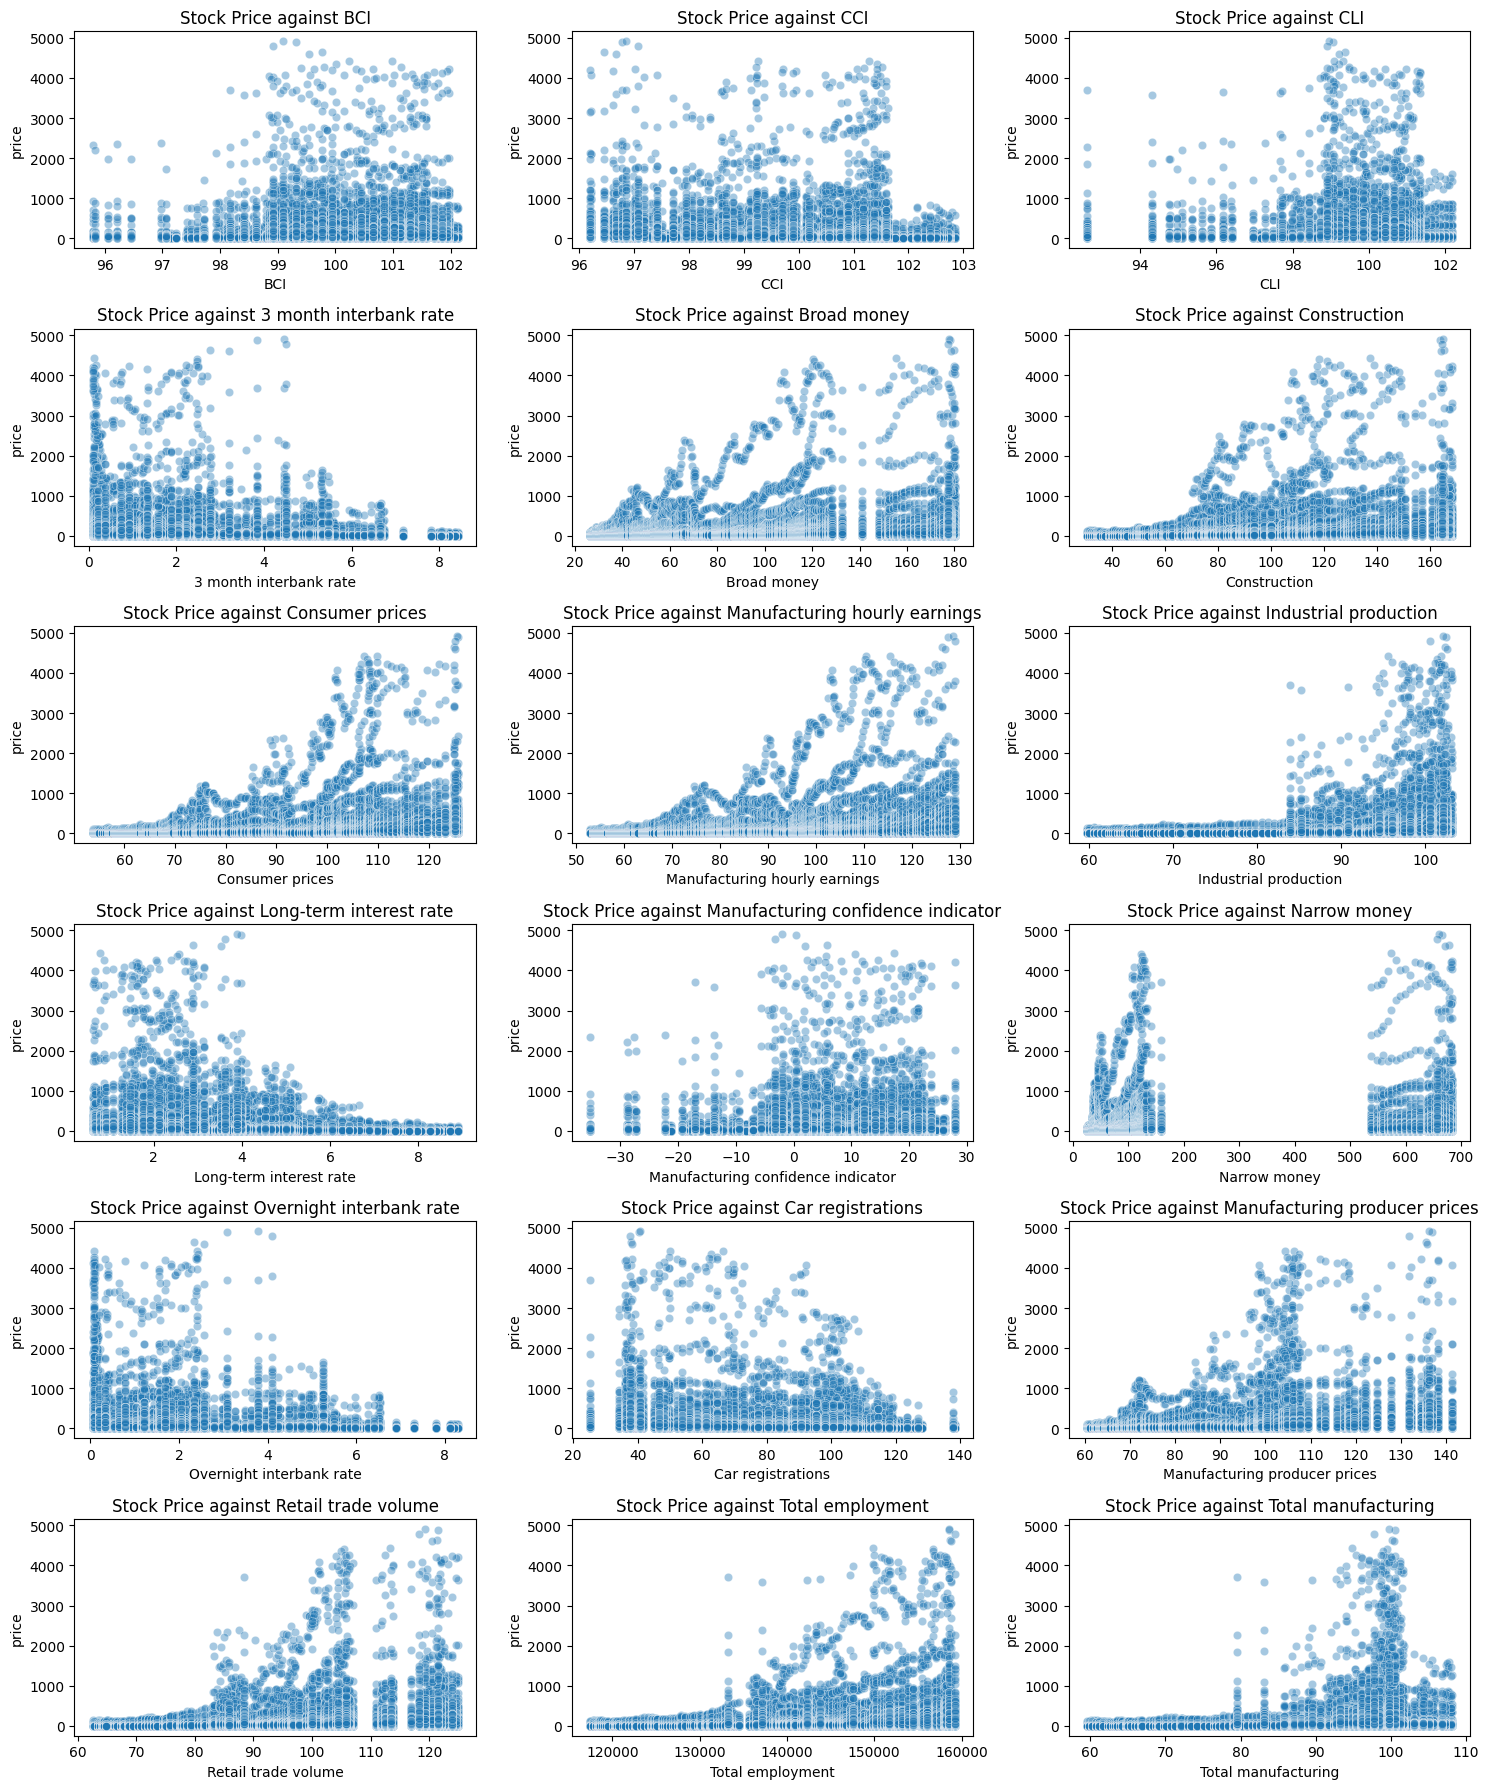

In [11]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3*n_rows), constrained_layout=True)

# Flatten the axes array for easy indexing in case of a single row or column of subplots
axes = axes.flatten()

indicator_columns = stock_prices_melted_df.columns[3:]
for i, column in enumerate(indicator_columns):
    sns.scatterplot(ax=axes[i], data=stock_prices_melted_df, x=column, y="price", alpha=0.4)
    axes[i].set_title(f"Stock Price against {column}")

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In the following plot, we explore the relationship between the log of stock price and economic Indicators.

C:\Users\brarn\AppData\Local\Temp\ipykernel_5144\3102215344.py:15: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


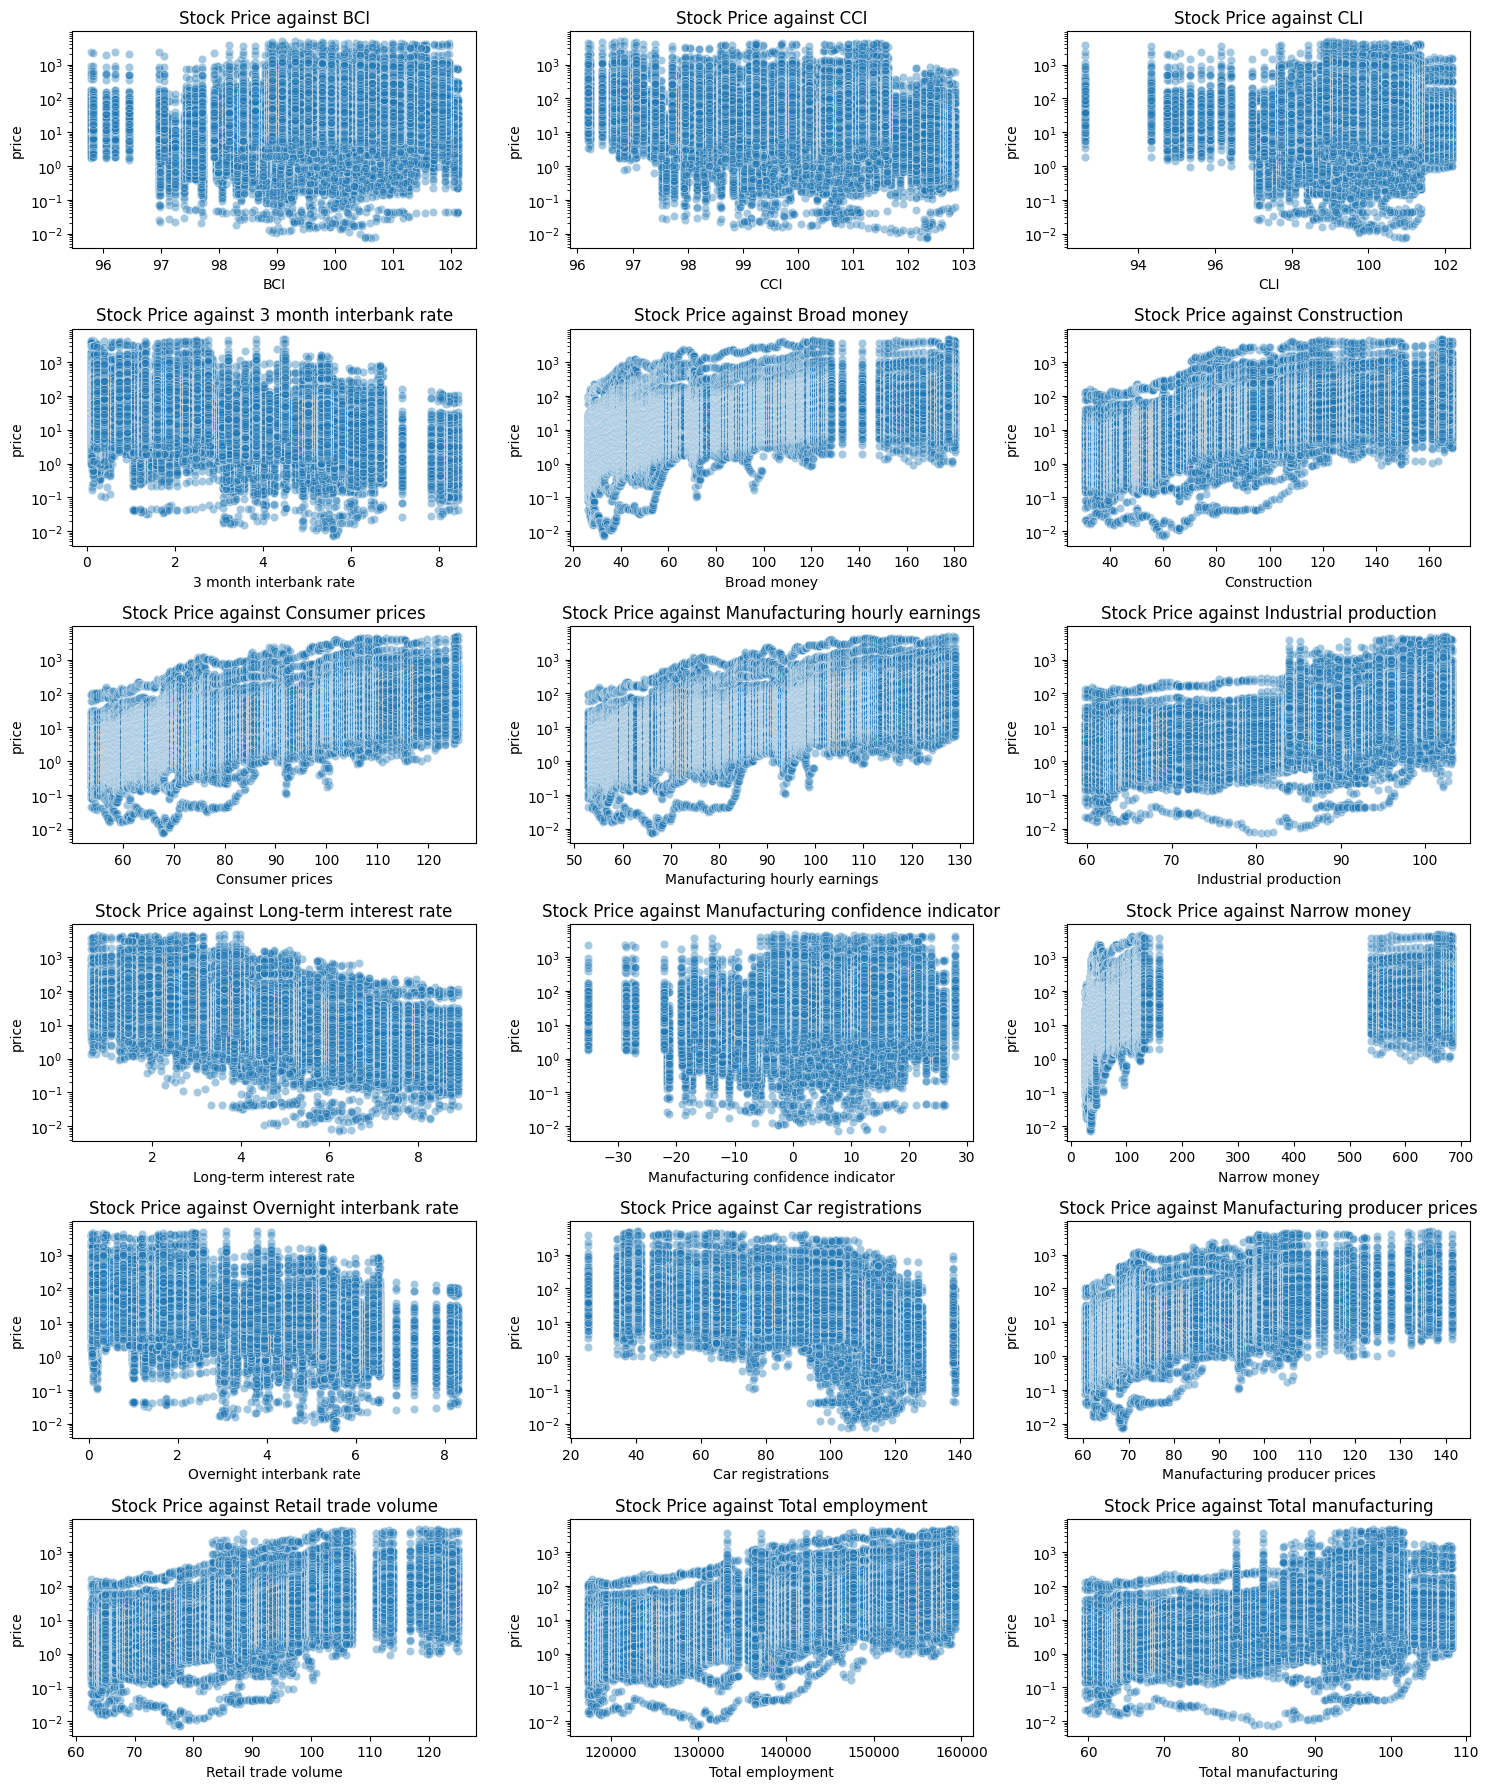

In [12]:
# Create a figure and axes for the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 3*n_rows), constrained_layout=True)

# Flatten the axes array for easy indexing in case of a single row or column of subplots
axes = axes.flatten()

for i, column in enumerate(indicator_columns):
    sns.scatterplot(ax=axes[i], data=stock_prices_melted_df, x=column, y="price", alpha=0.4)
    axes[i].set_title(f"Stock Price against {column}")
    
    # Set the y-axis of the current plot to logarithmic scale
    axes[i].set_yscale('log')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()